# Ensemble - Random Forest (Bagging)
1. Bagging - Creating multiple models with different structures randomly and generate output

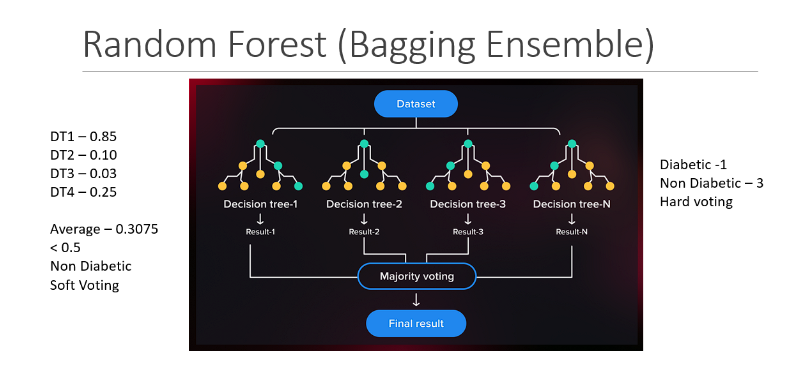

In [1]:

from warnings import filterwarnings
filterwarnings('ignore')

# Step 1: Read the train dataset

In [2]:

import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m = df.isna().sum()
m

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

0

# Step 3: Seperate X and Y(Survived)
Drop Passenger Id, Name, Ticket number these are statistically insignificant
Drop Cabin column because it has too many missing values

In [7]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [8]:

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:

Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [10]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

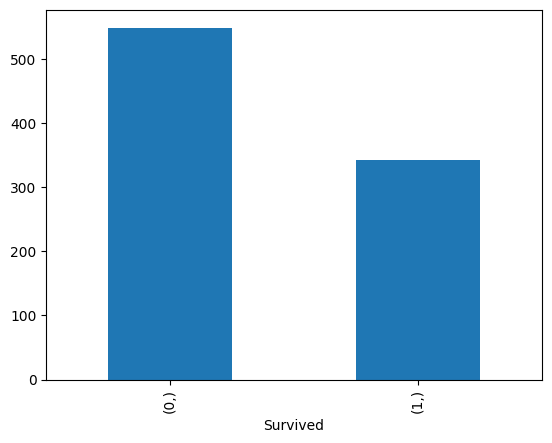

In [11]:
Y.value_counts().plot(kind='bar')

# Step 4: Perform preprocessing on X

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Sex', 'Embarked']

In [14]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [17]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore',
                                                 sparse_output=False))])

In [18]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


# Step 5 : Apply train test split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [21]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [22]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [23]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [24]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [25]:
xtrain.shape

(712, 10)

In [26]:
xtest.shape

(179, 10)


# Step 6: build the model

In [27]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,
                                criterion='gini',
                                max_depth=1, 
                                min_samples_split=5,
                                min_samples_leaf=5)
model1.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [28]:

model1.score(xtrain, ytrain)

0.6221910112359551

In [29]:
model1.score(xtest, ytest)

0.6201117318435754

# Tune the model with hyperparameter tuning

In [30]:
params1 = {'n_estimators':[10, 50, 100, 200],
           'max_depth':[1, 2, 3, 4, 5, 6, 7],
           'min_samples_split':[5, 6, 7, 8, 9, 10]}

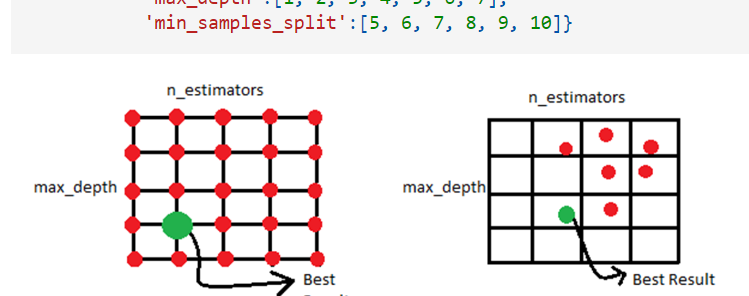

In [31]:
# For faster response use RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params1, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [32]:
rscv1.best_params_

{'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 5}

In [33]:

rscv1.best_score_

0.8080221621301493

In [34]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=200)

# 
Evaluate random forest

In [35]:
best_rfc.score(xtrain, ytrain)

0.8525280898876404

In [36]:
best_rfc.score(xtest, ytest)

0.8044692737430168

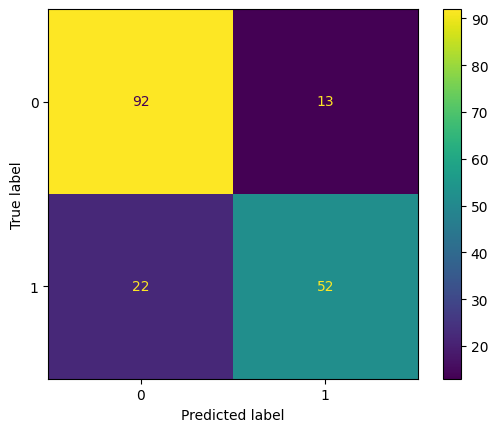

In [37]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rfc, xtest, ytest)

In [38]:

# Predict the results for train and test
ypred_train = best_rfc.predict(xtrain)
ypred_test = best_rfc.predict(xtest)

In [39]:
ypred_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [40]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [41]:
ypred_test[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [42]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [43]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

